In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Código de generación de datos

En este ejemplo, los datos se encuentran en un marco de datos denominado data.
- Las columnas son muestras individuales (es decir, celdas)
- Las filas son mediciones tomadas para todas las muestras (es decir, genes)

Solo por el bien del ejemplo, usaremos datos inventados ...


In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [ ]:
data.shape

(100, 10)

In [ ]:
data.head()

wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  383  390  339  350  346  651  633  624  643  654
gene2  504  493  523  495  493  471  487  512  451  464
gene3  840  885  883  850  875  917  905  843  929  906
gene4  215  219  217  245  209  112  115   94  110   92
gene5  191  167  181  182  201  172  144  150  154  135

# Calculando PCA

## Centrado y escalado

In [ ]:
scaled_data = preprocessing.scale(data.T)

In [ ]:
pd.DataFrame(scaled_data).describe()

0             1             2             3             4   \
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01   
mean  -1.998401e-16  2.220446e-16 -3.663736e-16  1.110223e-16  2.886580e-16   
std    1.054093e+00  1.054093e+00  1.054093e+00  1.054093e+00  1.054093e+00   
min   -1.054559e+00 -1.436996e+00 -1.540365e+00 -1.039972e+00 -1.326792e+00   
25%   -1.006353e+00 -9.661775e-01 -8.475233e-01 -1.012041e+00 -8.295786e-01   
50%    5.984257e-03  2.396896e-02  5.478287e-02 -9.962130e-02 -7.207923e-02   
75%    9.717768e-01  1.016969e+00  9.651453e-01  9.850405e-01  8.522702e-01   
max    1.093124e+00  1.188176e+00  1.327679e+00  1.269008e+00  1.476290e+00   

                 5             6             7             8             9   \
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01   
mean  -3.552714e-16  1.232348e-15  1.110223e-17  1.110223e-16  8.881784e-17   
std    1.054093e+00  1.054093e+00  1.054093e+00  1.054093e+00  1.054093e+00   
min   -1.660734e+00 -1.187886e+00 -1.397829e+00 -1.075152e+00 -1.087279e+00   
25%   -8.128238e-01 -7.539553e-01 -8.745212e-01 -9.915455e-01 -9.659799e-01   
50%    6.432419e-02 -2.657828e-01 -4.916987e-02 -1.946654e-02 -5.899535e-02   
75%    8.245191e-01  5.478380e-01  9.166668e-01  1.011262e+00  8.865843e-01   
max    1.380046e+00  2.337804e+00  1.454023e+00  1.081141e+00  1.316644e+00   

       ...            90         91            92            93            94  \
count  ...  1.000000e+01  10.000000  1.000000e+01  1.000000e+01  1.000000e+01   
mean   ...  2.553513e-16   0.000000 -9.603429e-16 -4.635181e-16  8.881784e-17   
std    ...  1.054093e+00   1.054093  1.054093e+00  1.054093e+00  1.054093e+00   
min    ... -1.226488e+00  -1.043962 -1.918385e+00 -1.845417e+00 -1.059491e+00   
25%    ... -9.434094e-01  -0.988961 -5.253227e-01 -7.467065e-01 -9.737484e-01   
50%    ... -8.856725e-02  -0.027762  3.828262e-02 -9.581171e-02 -2.437987e-02   
75%    ...  7.971052e-01   0.975342  3.466704e-01  8.050267e-01  9.683765e-01   
max    ...  1.665961e+00   1.161296  1.782269e+00  1.383021e+00  1.097507e+00   

                 95            96            97            98            99  
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  
mean  -6.994405e-16  5.551115e-17 -2.220446e-17  2.220446e-17  3.330669e-17  
std    1.054093e+00  1.054093e+00  1.054093e+00  1.054093e+00  1.054093e+00  
min   -1.173233e+00 -1.044497e+00 -1.034986e+00 -1.099551e+00 -1.062923e+00  
25%   -6.232800e-01 -9.955915e-01 -9.955924e-01 -1.015726e+00 -1.011253e+00  
50%   -2.002393e-01 -7.113485e-03 -2.865014e-02  2.196790e-02 -9.595834e-02  
75%    3.003589e-01  9.828465e-01  8.845731e-01  9.657205e-01  8.931507e-01  
max    2.295701e+00  1.071765e+00  1.185400e+00  1.178173e+00  1.387705e+00  

[8 rows x 100 columns]

In [ ]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

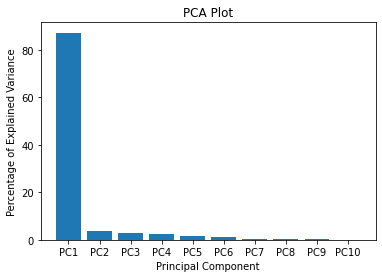

In [ ]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

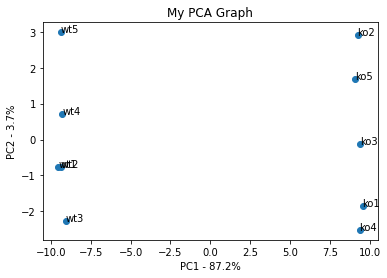

In [ ]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [ ]:


 
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene60     0.106835
gene86     0.106829
gene21     0.106824
gene67    -0.106785
gene12     0.106773
gene8      0.106772
gene13     0.106771
gene100   -0.106767
gene52    -0.106764
gene4     -0.106761
dtype: float64
